In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("nombres2.csv")

In [6]:
df.columns = ["anio","nombre","sexo","inscritos", "proporcion"]

In [7]:
# Se usa más abajo
mortalidad_hombres = pd.read_excel("Tabla Mortalidades.xlsx", sheet_name="Hombres")
mortalidad_mujeres = pd.read_excel("Tabla Mortalidades.xlsx", sheet_name="Mujeres")
mortalidad_hombres["Nacimiento"] = 2022 - mortalidad_hombres.Edad
mortalidad_hombres.set_index("Nacimiento", inplace = True)
mortalidad_mujeres["Nacimiento"] = 2022 - mortalidad_mujeres.Edad
mortalidad_mujeres.set_index("Nacimiento", inplace = True)

def la_muerte(x):
    anio, inscritos, sexo = x
    if sexo == "M" or sexo == "I":
        return round(mortalidad_hombres.loc[anio, "vivos"] * inscritos, 0)
    else :
        return round(mortalidad_mujeres.loc[anio, "vivos"] * inscritos, 0)

In [8]:
# mejorar esto porque se salta los empates
df['ranking_genero'] = df.groupby(["anio","sexo"])['inscritos'].rank(ascending=False, method= "first")
df['ranking_singenero'] = df.groupby(["anio"])['inscritos'].rank(ascending=False, method= "first")
df['ranking_nombre'] = df.groupby(["nombre"])['inscritos'].rank(ascending=False, method= "first")
df["vivos"] = df[["anio","inscritos", "sexo"]].apply(lambda x: la_muerte(x), axis = 1)
freq = df[["nombre","inscritos"]].groupby("nombre", as_index= False).sum().sort_values("inscritos", ascending = False)
# nombres agrupados según frecuencia
print(len(freq))

195837


In [9]:
freq.head()

,nombre,inscritos
124112,María,961020
97892,José,588613
98458,Juan,581513
115900,Luis,505794
26851,Carlos,293719


# Pregunta 1: Baby Names

## Nombres el 2021

In [10]:
nombre = "Pablo"
genero = "M"

In [11]:
from scipy import stats

#inverse of quantile
anio2021 = df.query("anio == 2021").sort_values("ranking_singenero")
pos = anio2021[anio2021.nombre == nombre]["ranking_singenero"].values[0]
percent = stats.percentileofscore(anio2021['ranking_singenero'], pos )
total2021 = len(anio2021["nombre"].value_counts())

print(f"posicion ranking: {pos}")
print(f"percentil: {percent}%")
print(f"total inscritos año: {total2021}")

posicion ranking: 117.0
percentil: 0.8820203543158688%
total inscritos año: 13018


## Nombres el 1999

In [12]:
from scipy import stats

#inverse of quantile
anio1999 = df.query("anio == 1999").sort_values("ranking_singenero")
pos = anio1999[anio1999.nombre == nombre]["ranking_singenero"].values[0]
percent = stats.percentileofscore(anio1999['ranking_singenero'], pos )
total1999 = len(anio2021["nombre"].value_counts())

print(f"posicion ranking: {pos}")
print(f"percentil: {percent}%")
print(f"total inscritos año: {total1999}")

posicion ranking: 30.0
percentil: 0.26373626373626374%
total inscritos año: 13018


## Nombre a lo largo de los años

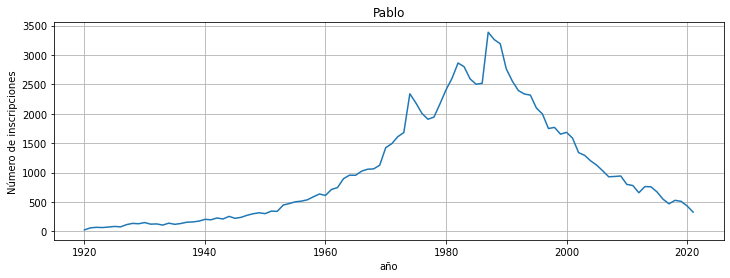

In [13]:
df_nombre = df.query(f"nombre == '{nombre}' & sexo == '{genero}'")
df_nombre.index = df_nombre.anio
fig = plt.figure()
ax = df_nombre["inscritos"].plot(title = nombre, grid = True, figsize = (12,4))
ax.set_xlabel("año")
ax.set_ylabel("Número de inscripciones")
# plt.axvline(x=1963, color = "red")
fig.savefig("Inscritos.png")

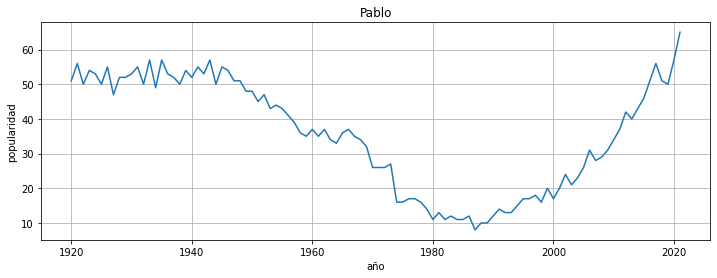

In [14]:
fig = plt.figure()
ax = df_nombre.ranking_genero.plot(title = nombre, grid = True, figsize = (12,4))
ax.set_xlabel("año")
ax.set_ylabel("popularidad")
fig.savefig("Popularidad.png")


In [15]:
freq.loc[:,"proporcion"] = freq.inscritos/ freq.inscritos.sum()
freq['ranking'] = freq['inscritos'].rank(ascending=False, method= "first")

#inverse of quantile
pos = freq[freq.nombre == nombre]["ranking"].values[0]
percent = stats.percentileofscore(freq['ranking'], pos )

print(f"posicion ranking: {pos}")
print(f"percentil: {100-percent}%")

posicion ranking: 34.0
percentil: 99.98263862293642%


In [16]:
freq[freq.nombre == nombre].sum()

nombre           Pablo
inscritos       106423
proporcion    0.004809
ranking           34.0
dtype: object

## Corrección por muerte

In [17]:
pob = df.vivos.sum()
pob

19541249.0

<ipython-input-18-ddf508721b88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nombre["vivos"] = df_nombre[["anio","inscritos", "sexo"]].apply(lambda x: la_muerte(x), axis = 1)


<Figure size 864x288 with 0 Axes>

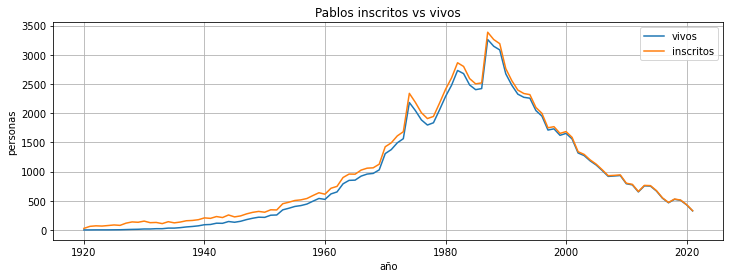

In [18]:
df_nombre["vivos"] = df_nombre[["anio","inscritos", "sexo"]].apply(lambda x: la_muerte(x), axis = 1)
fig = plt.figure(figsize = (12,4))
aux = df_nombre.loc[:,["vivos","inscritos"]]
ax = aux.plot(title = "Pablos inscritos vs vivos", grid = True, figsize = (12,4))
ax.set_xlabel("año")
ax.set_ylabel("personas")
fig.savefig("Vivos vs Muertos.png")

In [19]:
freq_corregida = df[["nombre","vivos","inscritos"]].groupby("nombre", as_index= False).sum().sort_values("vivos", ascending = False)
nombres_muertos = freq_corregida.query("vivos == 0")
nombres_vivos = freq_corregida.query("vivos > 0").copy()
print(f"Hay {len(nombres_muertos)} nombres muertos")
print(f"Hay {len(nombres_vivos)} nombres vivos")

Hay 7323 nombres muertos
Hay 188514 nombres vivos


In [22]:
nombres_vivos.loc[:,"proporcion"] = nombres_vivos.vivos/ nombres_vivos.vivos.sum()
nombres_vivos['ranking'] = nombres_vivos['vivos'].rank(ascending=False, method= "first")

#inverse of quantile
pos = nombres_vivos[nombres_vivos.nombre == nombre]["ranking"].values[0]
percent = stats.percentileofscore(nombres_vivos['ranking'], pos )

print(f"posicion ranking: {pos}")
print(f"percentil: {100-percent}%")

posicion ranking: 33.0
percentil: 99.98249466883097%


In [23]:
nombres_vivos

,nombre,vivos,inscritos,proporcion,ranking
124112,María,809718.0,961020,4.143635e-02,1.0
98458,Juan,466137.0,581513,2.385400e-02,2.0
97892,José,452718.0,588613,2.316730e-02,3.0
115900,Luis,395352.0,505794,2.023166e-02,4.0
26851,Carlos,239601.0,293719,1.226129e-02,5.0
...,...,...,...,...,...
79643,Huakelen,1.0,1,5.117380e-08,188510.0
77898,Hiaan,1.0,1,5.117380e-08,188511.0
79486,Hosguar,1.0,1,5.117380e-08,188512.0
79646,Hualberto,1.0,1,5.117380e-08,188513.0


# Prergunta 2: Did The Beatles impact the regustration of Chilean babies' names

## Gráficos por nombre

In [24]:
def completar(df, nombre, genero):
    for a in range(1920,2022):
        if a not in df.index:
            df.loc[a] = [nombre, genero, 0, 0]
    return df.sort_index()

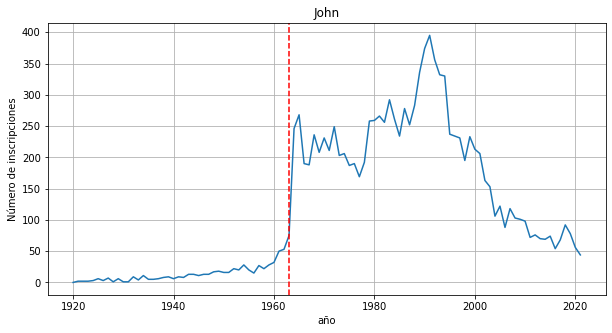

In [36]:
John = df.query(f"nombre == 'John' & sexo == 'M'")[["anio", "nombre", "sexo", "inscritos", "proporcion"]]
John.set_index("anio", inplace = True)
John = completar(John, "John", "M")
fig = plt.figure()
ax = John["inscritos"].plot(title = "John", grid = True, figsize = (10,5))
ax.set_xlabel("año")
ax.set_ylabel("Número de inscripciones")
plt.axvline(x=1963, color = "red", linestyle = "--")
fig.savefig("John.png")

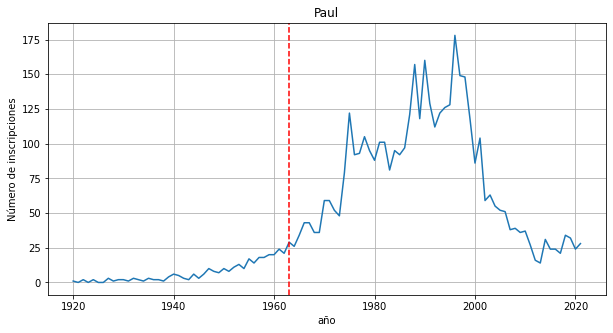

In [37]:
Paul = df.query(f"nombre == 'Paul' & sexo == 'M'")[["anio", "nombre", "sexo", "inscritos", "proporcion"]]
Paul.index = Paul.anio
Paul.set_index("anio", inplace = True)
Paul = completar(Paul, "Paul", "M")
fig = plt.figure()
ax = Paul["inscritos"].plot(title = "Paul", grid = True, figsize = (10,5))
ax.set_xlabel("año")
ax.set_ylabel("Número de inscripciones")
plt.axvline(x=1963, color = "red", linestyle = "--")
fig.savefig("Paul.png")

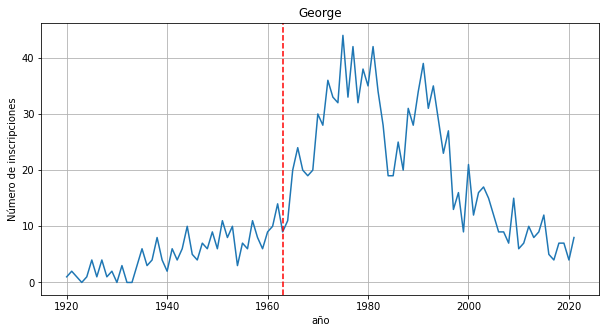

In [38]:
George = df.query(f"nombre == 'George' & sexo == 'M'")[["anio", "nombre", "sexo", "inscritos", "proporcion"]]
George.index = George.anio
George.set_index("anio", inplace = True)
George = completar(George, "George", "M")
fig = plt.figure()
ax = George["inscritos"].plot(title = "George", grid = True, figsize = (10,5))
ax.set_xlabel("año")
ax.set_ylabel("Número de inscripciones")
plt.axvline(x=1963, color = "red", linestyle = "--")
fig.savefig("George.png")

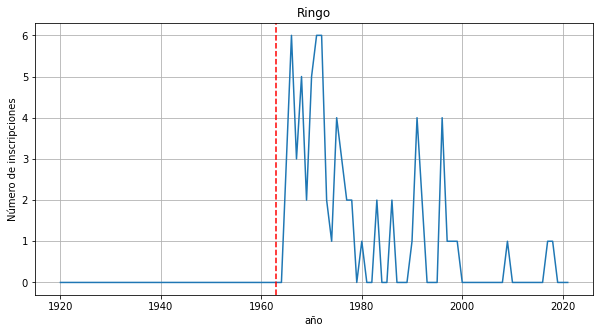

In [39]:
Ringo = df.query(f"nombre == 'Ringo' & sexo == 'M'")[["anio", "nombre", "sexo", "inscritos", "proporcion"]]
Ringo.index = Ringo.anio
Ringo.set_index("anio", inplace = True)
Ringo = completar(Ringo, "Ringo", "M")
fig = plt.figure()
ax = Ringo["inscritos"].plot(title = "Ringo", grid = True, figsize = (10,5))
ax.set_xlabel("año")
ax.set_ylabel("Número de inscripciones")
plt.axvline(x=1963, color = "red", linestyle = "--")
fig.savefig("Ringo.png")

In [40]:
TheBeatles = [John, Paul, George, Ringo]
for beatle in TheBeatles:
    pre = beatle[beatle.index <= 1963]
    post = beatle[beatle.index > 1963]
    pre_mean, post_mean = pre.proporcion.mean(), post.proporcion.mean()
    pre_std, post_std = pre.proporcion.std(), post.proporcion.std()
    pre_n, post_n = len(pre), len(post)
    dif = post_mean - pre_mean
    std = (pre_std**2/pre_n + post_std**2/post_n)**(1/2)
    intervalo = [dif - 1.96*std,dif +1.96*std]
    print(beatle.iloc[0].nombre)
    print(intervalo)

John
[0.0005413529178569589, 0.0006878170351210976]
Paul
[0.00019326789313663106, 0.0002708951005937763]
George
[2.9656446001356976e-05, 5.159049757231078e-05]
Ringo
[2.7202663741246776e-06, 5.736975005185666e-06]


In [41]:
post_n

58

# Pregunta 3: What can you say about the gender distribution in Chile across the years? Do you see any trends and/or singularities?

## Inscritos por género

<Figure size 432x288 with 0 Axes>

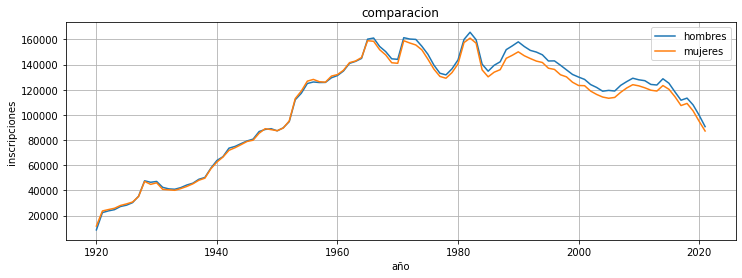

In [30]:
chile = pd.DataFrame()
chile["anio"] = [i for i in range(1920, 2022)]
chile.index = chile.anio
chile["todos"] = df.groupby("anio").sum("inscritos")["inscritos"].to_list()
chile["mujeres"] = df[df.sexo == "F"].groupby("anio").sum("inscritos")["inscritos"].to_list()
chile["hombres"] = df[df.sexo == "M"].groupby("anio").sum("inscritos")["inscritos"].to_list()
chile["hombre_vs_mujer"] = chile["hombres"]/chile["mujeres"]
fig = plt.figure()
aux = chile.loc[:,["hombres","mujeres"]]
ax = aux.plot(title = "comparacion", grid = True, figsize = (12,4))
ax.set_xlabel("año")
ax.set_ylabel("inscripciones")
fig.savefig("Inscripciones Genero.png")

## Ratio de inscritos por género

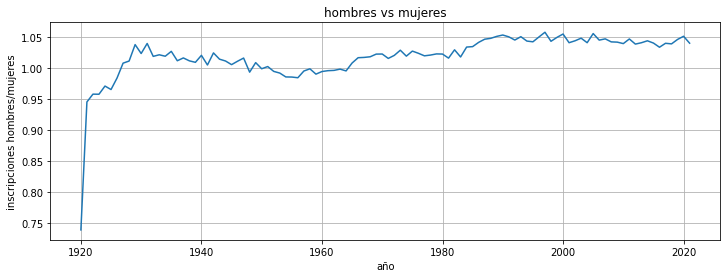

In [58]:

fig = plt.figure()
ax = chile.hombre_vs_mujer.plot(title = "hombres vs mujeres", grid = True, figsize = (12,4))
ax.set_xlabel("año")
ax.set_ylabel("inscripciones hombres/mujeres")
fig.savefig("Ratio Genero.png")

## Intervalo de confianza para el ratio

In [42]:
aux = chile.loc[:,["anio","hombre_vs_mujer"]]
aux.index = aux.anio
mean = aux.mean().values[1]
std = aux.std().values[1]
IC = [mean - 1.96*std/(102**0.5), mean + 1.96*std/(102**0.5)]
print(mean)
print(std)
print(IC)

1.0181518839425565
0.0367736309971925
[1.0110152651484292, 1.0252885027366838]


In [44]:
chile[chile.hombre_vs_mujer > mean + 1.96*std/(102**0.5)]

,anio,todos,mujeres,hombres,hombre_vs_mujer
anio,,,,,
1929,1929,91376,44849,46527,1.037414
1931,1931,83396,40895,42501,1.039271
1935,1935,87553,43202,44351,1.026596
1973,1973,315709,155642,160067,1.028431
1975,1975,292677,144390,148287,1.026989
1982,1982,326843,161082,165761,1.029047
1984,1984,276282,135867,140415,1.033474
1985,1985,265126,130335,134791,1.034189
1986,1986,273533,134015,139518,1.041063


<AxesSubplot:title={'center':'hombres vs mujeres'}, xlabel='anio'>

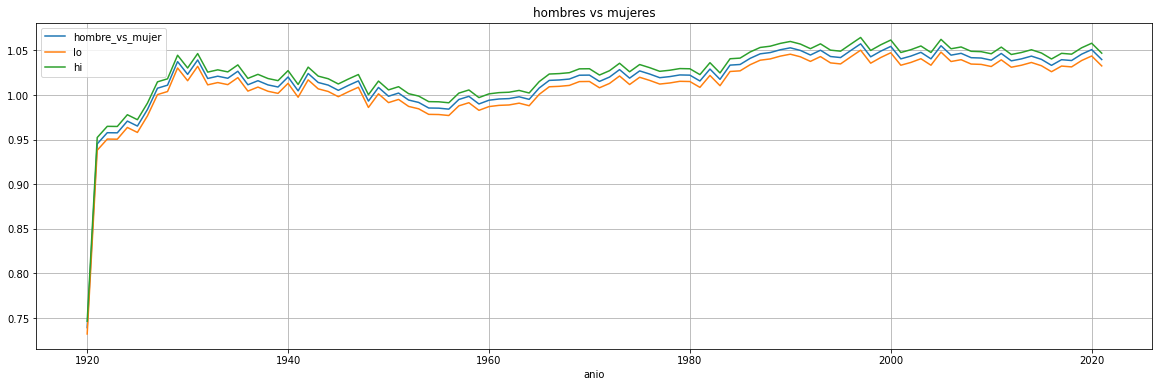

In [60]:
aux["lo"] = aux["hombre_vs_mujer"] - 1.96*std/102**0.5
aux["hi"] = aux["hombre_vs_mujer"] + 1.96*std/102**0.5
aux[["hombre_vs_mujer","lo","hi"]].plot(title = "hombres vs mujeres", grid = True, figsize = (20,6))

Text(0, 0.5, 'Proporcion Hombre/Mujer')

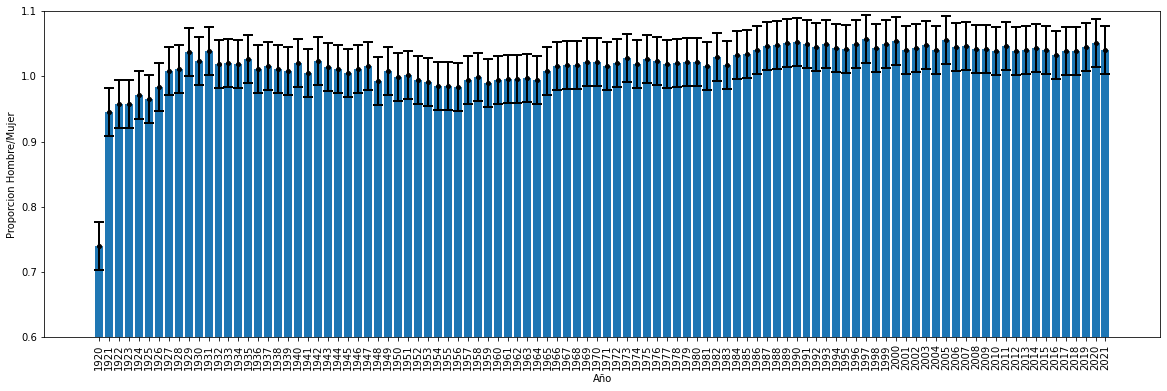

In [61]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_ylim([0.6, 1.1])
plt.errorbar(aux['anio'], aux['hombre_vs_mujer'], yerr=std, fmt='o', color='Black', elinewidth=2,capthick=2,errorevery=1, alpha= 1 , ms=4, capsize = 5)
plt.bar(aux['anio'], aux['hombre_vs_mujer'],tick_label = aux["anio"])##Bar plot

plt.xticks(rotation='vertical')
plt.xlabel('Año') ## label on X axis
plt.ylabel('Proporcion Hombre/Mujer') ## label on Y axis

# Miscelaneos

## Más Comunes Por Año

In [62]:
maximo_hombres = df.query("ranking_genero == 1 & sexo == 'M'").sort_values("anio")
maximo_mujeres = df.query("ranking_genero == 1 & sexo == 'F'").sort_values("anio")
maximo_hombres.to_excel("nombres_hombre.xlsx", index = False)
maximo_mujeres.to_excel("nombres_mujer.xlsx", index = False)

# Proporción de personas con un nombre en la UdeC

In [ ]:
import numpy as np

nombre = "Pablo"
genero = "M" 
prop_universitarios = df.query(f"nombre == '{nombre}'& sexo == '{genero}' & anio <= 2004 & anio >= 1995")
n_mean = prop_universitarios.proporcion.mean()*100
inscritos = len(prop_universitarios)
n_std = prop_universitarios.proporcion.std()*100
IC_nombre = np.array([n_mean - 1.96*n_std/(inscritos**0.5),n_mean + 1.96*n_std/(inscritos**0.5)])
gente_UdeC = 28905
nombre_UdeC = IC_nombre * gente_UdeC / 100

print("promedio: ",n_mean)
print("desv. est: ", n_std)
print("IC proporción:", IC_nombre)
print("IC Personas:",nombre_UdeC)

promedio:  0.6317597999999999
desv. est:  0.0754122168157565
IC proporción: [0.58501882 0.67850078]
IC Personas: [169.09969101 196.12064937]


## Guerra Bíblica

<AxesSubplot:title={'center':'comparacion'}, xlabel='anio'>

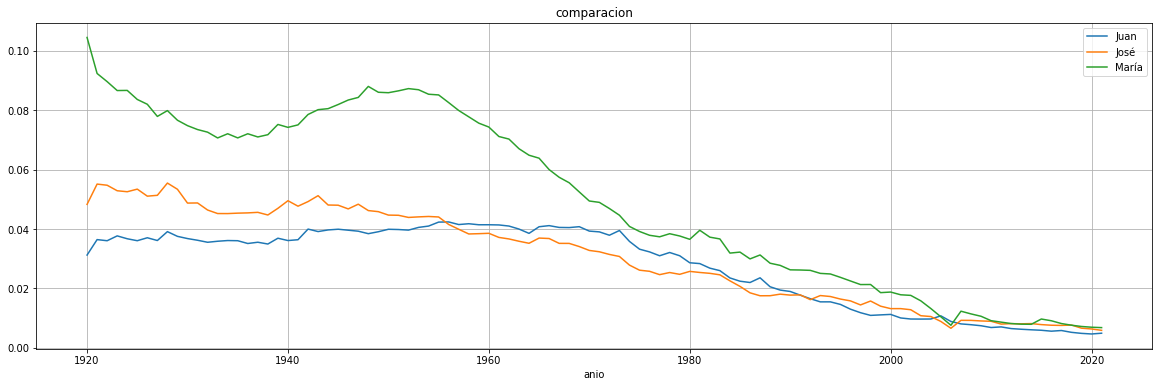

In [ ]:
names = [
    ("Juan","M"),
    ("José","M"),
    ("María","F")
    ]
comparacion = pd.DataFrame()
comparacion["anio"] = [i for i in range(1920, 2022)]
comparacion.index = comparacion.anio
for name, genero in names:
    comparacion[name] = df[(df.nombre == name) & (df.sexo == genero)]["proporcion"].to_list()
comparacion[list(list(zip(*names))[0])].plot(title = "comparacion", grid = True, figsize = (20,6))

<Figure size 432x288 with 0 Axes>

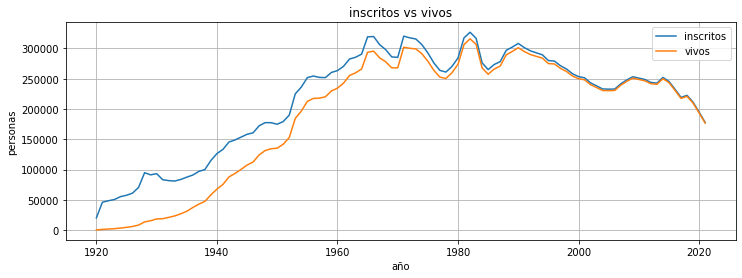

In [55]:
total = pd.DataFrame()
total["anio"] = [i for i in range(1920, 2022)]
total.index = total.anio
total["inscritos"] = df.groupby("anio").sum("inscritos")["inscritos"].to_list()
total["vivos"] = df.groupby("anio").sum("vivos")["vivos"].to_list()
fig = plt.figure()
aux = total.loc[:,["inscritos","vivos"]]
ax = aux.plot(title = "inscritos vs vivos", grid = True, figsize = (12,4))
ax.set_xlabel("año")
ax.set_ylabel("personas")
fig.savefig("Vivos vs inscritos.png")

In [72]:
edad = df[(df.nombre == "Pablo") & (df.vivos > 0)].copy()
edad["edad"] = 2022 - edad.anio
edad.vivos.sum()
edad.vivos.std()
edad_promedio = (edad.edad * edad.vivos).sum()/ edad.vivos.sum()
edad_promedio 

36.03987109498104

In [89]:
aux2 = nombres_vivos[nombres_vivos.vivos > 1].copy()
aux2.loc[:,"proporcion"] = aux2.vivos/ aux2.vivos.sum()
aux2['ranking'] = aux2['vivos'].rank(ascending=False, method= "first")

In [90]:
aux2

,nombre,vivos,inscritos,proporcion,ranking
124112,María,809718.0,961020,4.168849e-02,1.0
98458,Juan,466137.0,581513,2.399915e-02,2.0
97892,José,452718.0,588613,2.330827e-02,3.0
115900,Luis,395352.0,505794,2.035477e-02,4.0
26851,Carlos,239601.0,293719,1.233590e-02,5.0
...,...,...,...,...,...
176792,Widdy,2.0,2,1.029704e-07,70322.0
193810,Zatchel,2.0,2,1.029704e-07,70323.0
52820,Elvens,2.0,2,1.029704e-07,70324.0
96262,Johst,2.0,2,1.029704e-07,70325.0
